In [1]:
import tweepy #used to work with Twitter's API
import webbrowser
import time
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import re
import json
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [2]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN" #pulled from developer account for Twitter
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ" #pulled from developer account for Twitter
#key and secret is generated by Twitter developer account
accessToken = '781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2'
accessTokenSecret = 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Starts extraction of different views of data pulled from a twitter user's account

In [3]:
def extract_timeline_as_df(timeline_list):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    for status in timeline_list:
        status_dict = dict(vars(status))
        keys = status_dict.keys()
        single_tweet_data = {"user": status.user.screen_name, "author": status.author.screen_name}
        for k in keys:
            try:
                v_type = type(status_dict[k])
            except:
                v_type = None
            if v_type != None:
                if v_type in allowed_types:
                    single_tweet_data[k] = status_dict[k]
                    columns.add(k)
        tweets_data.append(single_tweet_data)


    header_cols = list(columns)
    header_cols.append("user")
    header_cols.append('author')
    df = pd.DataFrame(tweets_data, columns=header_cols)
    return df

### Change screen_name variable if needed to see different results of a different twitter user

In [4]:
screen_name = "@code" #change if needed 

# fetching the statuses
user_timeline = api.user_timeline(screen_name, count=201)#tweet count limit is 200
df1 = extract_timeline_as_df(user_timeline)
print(df1)


     in_reply_to_user_id in_reply_to_status_id_str  in_reply_to_status_id  \
0                    NaN                       NaN                    NaN   
1                    NaN                       NaN                    NaN   
2                    NaN                       NaN                    NaN   
3                    NaN                       NaN                    NaN   
4                    NaN                       NaN                    NaN   
..                   ...                       ...                    ...   
195         7.428656e+07       1387421368581455874           1.387421e+18   
196                  NaN                       NaN                    NaN   
197         2.771030e+09       1386968244884578304           1.386968e+18   
198         3.064134e+08       1386845600860278786           1.386846e+18   
199         1.023306e+09       1386892072813223938           1.386892e+18   

     favorite_count  retweet_count lang in_reply_to_screen_name  \
0       

In [5]:
screen_name = "@code" #change if needed 
user = api.get_user(screen_name)
user_timeline = user.timeline() 
df1 = extract_timeline_as_df(user_timeline) #recent tweets are pulled in the spreadsheet
df1.head(201)

,in_reply_to_user_id,in_reply_to_status_id_str,in_reply_to_status_id,favorite_count,retweet_count,lang,in_reply_to_screen_name,source,id_str,quoted_status_id,source_url,text,quoted_status_id_str,in_reply_to_user_id_str,id,user,author
0,NaN,NaN,NaN,0,102,en,NaN,Twitter Web App,1418337589036212224,NaN,https://mobile.twitter.com,RT @_AndreaMah_: Check out @code's new web pre...,NaN,NaN,1418337589036212224,code,code
1,NaN,NaN,NaN,0,51,en,NaN,Buffer,1418236398918852612,NaN,https://buffer.com,RT @pythonvscode: 📢 The July release of the #P...,NaN,NaN,1418236398918852612,code,code
2,NaN,NaN,NaN,100,40,en,NaN,Buffer,1418221814757486614,NaN,https://buffer.com,Come learn about @Prisma in 10 minutes! We're ...,NaN,NaN,1418221814757486614,code,code
3,NaN,NaN,NaN,0,10,en,NaN,Buffer,1417918551797739527,NaN,https://buffer.com,RT @mattbierner: Today's @code tip: Import sta...,NaN,NaN,1417918551797739527,code,code
4,NaN,NaN,NaN,0,28,en,NaN,Buffer,1417873758300385282,NaN,https://buffer.com,RT @codepo8: If you're a user of the Chrome or...,NaN,NaN,1417873758300385282,code,code
5,NaN,NaN,NaN,0,27,en,NaN,Buffer,1417607254094893060,NaN,https://buffer.com,RT @pythonvscode: Have you signed up for @euro...,NaN,NaN,1417607254094893060,code,code
6,NaN,NaN,NaN,74,7,en,NaN,TweetDeck,1417559267637284865,NaN,https://about.twitter.com/products/tweetdeck,Learn about debugging JS apps with VS Code and...,NaN,NaN,1417559267637284865,code,code
7,NaN,NaN,NaN,0,36,en,NaN,TweetDeck,1417237638268915716,NaN,https://about.twitter.com/products/tweetdeck,RT @TylerLeonhardt: 🚀 In @code insiders today....,NaN,NaN,1417237638268915716,code,code
8,NaN,NaN,NaN,50,6,en,NaN,Buffer,1417202585174413315,1.416446e+18,https://buffer.com,🔟 We're going live in 10 minutes! Tune in at 1...,1416445857499582467,NaN,1417202585174413315,code,code
9,NaN,NaN,NaN,188,21,en,NaN,Buffer,1416827867481190400,1.411007e+18,https://buffer.com,Learn to build web apps with @vuejs and @code ...,1411006761327370240,NaN,1416827867481190400,code,code


List the interaction of the twitter user's account based on a statistical analysis of whom they replied to, the amount of favorite and retweets received, and how many times they interacted with another user. 

In [6]:
df1.describe()

,in_reply_to_user_id,in_reply_to_status_id,favorite_count,retweet_count,quoted_status_id,id
count,1.0,1.000000e+00,20.000000,20.000000,4.000000e+00,2.000000e+01
mean,1174791.0,1.415819e+18,87.050000,35.600000,1.414637e+18,1.416819e+18
std,NaN,NaN,210.618257,35.282917,2.494088e+15,9.911305e+14
min,1174791.0,1.415819e+18,0.000000,0.000000,1.411007e+18,1.415431e+18
25%,1174791.0,1.415819e+18,0.000000,15.250000,1.414020e+18,1.416003e+18
50%,1174791.0,1.415819e+18,0.000000,28.000000,1.415548e+18,1.416637e+18
75%,1174791.0,1.415819e+18,80.500000,42.750000,1.416166e+18,1.417674e+18
max,1174791.0,1.415819e+18,934.000000,148.000000,1.416446e+18,1.418338e+18


In [7]:
df1.shape

(20, 17)

In [8]:
df1.to_csv('tweetspreadsheet.csv', index=False)

In [9]:
df1_saved_file = pd.read_csv('tweetspreadsheet.csv')
df1_saved_file

,in_reply_to_user_id,in_reply_to_status_id_str,in_reply_to_status_id,favorite_count,retweet_count,lang,in_reply_to_screen_name,source,id_str,quoted_status_id,source_url,text,quoted_status_id_str,in_reply_to_user_id_str,id,user,author
0,NaN,NaN,NaN,0,102,en,NaN,Twitter Web App,1418337589036212224,NaN,https://mobile.twitter.com,RT @_AndreaMah_: Check out @code's new web pre...,NaN,NaN,1418337589036212224,code,code
1,NaN,NaN,NaN,0,51,en,NaN,Buffer,1418236398918852612,NaN,https://buffer.com,RT @pythonvscode: 📢 The July release of the #P...,NaN,NaN,1418236398918852612,code,code
2,NaN,NaN,NaN,100,40,en,NaN,Buffer,1418221814757486614,NaN,https://buffer.com,Come learn about @Prisma in 10 minutes! We're ...,NaN,NaN,1418221814757486614,code,code
3,NaN,NaN,NaN,0,10,en,NaN,Buffer,1417918551797739527,NaN,https://buffer.com,RT @mattbierner: Today's @code tip: Import sta...,NaN,NaN,1417918551797739527,code,code
4,NaN,NaN,NaN,0,28,en,NaN,Buffer,1417873758300385282,NaN,https://buffer.com,RT @codepo8: If you're a user of the Chrome or...,NaN,NaN,1417873758300385282,code,code
5,NaN,NaN,NaN,0,27,en,NaN,Buffer,1417607254094893060,NaN,https://buffer.com,RT @pythonvscode: Have you signed up for @euro...,NaN,NaN,1417607254094893060,code,code
6,NaN,NaN,NaN,74,7,en,NaN,TweetDeck,1417559267637284865,NaN,https://about.twitter.com/products/tweetdeck,Learn about debugging JS apps with VS Code and...,NaN,NaN,1417559267637284865,code,code
7,NaN,NaN,NaN,0,36,en,NaN,TweetDeck,1417237638268915716,NaN,https://about.twitter.com/products/tweetdeck,RT @TylerLeonhardt: 🚀 In @code insiders today....,NaN,NaN,1417237638268915716,code,code
8,NaN,NaN,NaN,50,6,en,NaN,Buffer,1417202585174413315,1.416446e+18,https://buffer.com,🔟 We're going live in 10 minutes! Tune in at 1...,1.416446e+18,NaN,1417202585174413315,code,code
9,NaN,NaN,NaN,188,21,en,NaN,Buffer,1416827867481190400,1.411007e+18,https://buffer.com,Learn to build web apps with @vuejs and @code ...,1.411007e+18,NaN,1416827867481190400,code,code


In [10]:
# screen name of the account to be fetched
screen_name = "@code" #change if needed 
#will display last fetched tweet as the Twitter account's "Pinned Tweet" if they have a pinned tweet
  
# number of statuses to be fetched
count = 5
  
# fetching the statuses
statuses = api.user_timeline(screen_name, count = count)
  
# printing the statuses
for status in statuses:
    print(status.text, end = "\n\n") 

RT @_AndreaMah_: Check out @code's new web previewer, Live Preview! 💻👀Preview your changes within the editor or in an external window and s…

RT @pythonvscode: 📢 The July release of the #Python extension for VS @code is out! Here's what's new:

- Quick fix for configuring project…

Come learn about @Prisma in 10 minutes! We're going live with @carmen_berndt and @ruheni_alex to talk about this… https://t.co/nZWlO73viA

RT @mattbierner: Today's @code tip: Import statement completions

Write 'import' followed by the symbol you want to import and VS Code will…

RT @codepo8: If you're a user of the Chrome or Edge Debugger extensions for @code you can now safely uninstall them - JavaScript debugging…



### User enters in hashtag to pull top 10 tweet interaction of that hashtag

In [11]:
#search_words = ["#covid19", "2020", "lockdown"]
key_word = input("Enter hashtag to  pull from Twitter: ")#'@code' #searches all tweets that reference the key_word specified 
date_since = input("Enter date with 7 days of running this code, date format is YYYY-MM-DD: ")#Examle of date format 2021-06-21

tweets = tweepy.Cursor(api.search, key_word, geocode="38.892062,-77.019912,3000km", lang="en", since=date_since).items(10)
## the geocode is for Washington, DC; format for geocode="lattitude,longitude,radius"
## radius should be in miles or km
#items references the number of tweets to pull 


for tweet in tweets:
    print("created_at: {}\nuser: {}\ntweet text: {}\ngeo_location: {}".
            format(tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location))
    print("\n")
## tweet.user.location will give you the general location of the user and not the particular location for the tweet itself, as it turns out, most of the users do not share the exact location of the tweet

Enter hashtag to  pull from Twitter: python
Enter date with 7 days of running this code, date format is YYYY-MM-DD: 2021-07-23
created_at: 2021-07-23 14:01:39
user: EdKwedar
tweet text: Top Reading List for Geeks in #ML, #Mathematics | #BigData #Analytics #DataScience #IoT #IIoT #PyTorch #Python… https://t.co/pj8Z9HQ1KG
geo_location: Philadelphia PA


created_at: 2021-07-23 14:01:34
user: DataCamp
tweet text: 🚨New Course Launch: Bond Valuation and Analysis in #Python! 🚨
In this course, you'll learn how bonds work and how t… https://t.co/sOYBg1oWnw
geo_location: New York


created_at: 2021-07-23 14:01:04
user: Glorentino1
tweet text: I got a whole month learning Python and it feels good when I can read a code and understand what’s going on
geo_location: Nyc


created_at: 2021-07-23 14:00:57
user: Paula_Piccard
tweet text: Bias in AI isn’t an enterprise priority, but it should be, survey warns

https://t.co/X6RzebV3zT

#MachineLearning… https://t.co/FkKTAze6Qa
geo_location: New York


cr

In [12]:
#searches all relevant tweet as specified from date range 
print("Date format is as follows: Year-Month-Day= 0000-00-00")
print("Date range must be within a 7 day range")
date_since = input("Enter beginging date, YYYY-MM-DD: ") # Example 2021-06-14
date_until = input("Enter last date, YYYY-MM-DD: ")# Example 2021-06-21 
tweets = tweepy.Cursor(api.search, geocode="38.892062,-77.019912,3000km", lang="en", q= "@code", since=date_since,until=date_until).items(10) #'olympic'
#If want different user, change q= input("Enter key word to search through Twitter's API of relevant Tweets: ")
for tweet in tweets:         
    print (tweet.text)  

Date format is as follows: Year-Month-Day= 0000-00-00
Date range must be within a 7 day range
Enter beginging date, YYYY-MM-DD: 2021-07-16
Enter last date, YYYY-MM-DD: 2021-07-23
@buhakmeh @sblom @linqpad @NuGetPE @code @JetBrainsRider And now there's also an online version of the NuGet Packag… https://t.co/1JG8KFZJ4n
@buhakmeh @sblom @linqpad @NuGetPE @code @JetBrainsRider I did eventually find a VSCode plugin:
https://t.co/3GGGvXPXkH
@sblom @evntdrvn @linqpad @NuGetPE @code Or use @JetBrainsRider which has a great NuGet story. Pull packages down i… https://t.co/afFVE4iDxb
@pixlee @ChiThukral @jeeveswilliams @skuurstra @megmacdoodle @AlexandriasTech @tweevtran @theDevBee @multiplay3r… https://t.co/xIF3D0UGDZ
@pixlee @ChiThukral @jeeveswilliams @skuurstra @megmacdoodle @AlexandriasTech @tweevtran @theDevBee @multiplay3r… https://t.co/O6u5a145zR
Check out @code's new web previewer, Live Preview! 💻👀Preview your changes within the editor or in an external windo… https://t.co/6EOUWLwTc8
@B

In [13]:
for status in tweepy.Cursor(api.user_timeline, screen_name=screen_name, tweet_mode="extended").items(10): 
    print(status.full_text)

RT @_AndreaMah_: Check out @code's new web previewer, Live Preview! 💻👀Preview your changes within the editor or in an external window and s…
RT @pythonvscode: 📢 The July release of the #Python extension for VS @code is out! Here's what's new:

- Quick fix for configuring project…
Come learn about @Prisma in 10 minutes! We're going live with @carmen_berndt and @ruheni_alex to talk about this #JavaScript ORM and how it can be used by devs working with VS Code 💿
Join live 👉 https://t.co/iPWBnPCrd2 https://t.co/u5xSJ9Qanw
RT @mattbierner: Today's @code tip: Import statement completions

Write 'import' followed by the symbol you want to import and VS Code will…
RT @codepo8: If you're a user of the Chrome or Edge Debugger extensions for @code you can now safely uninstall them - JavaScript debugging…
RT @pythonvscode: Have you signed up for @europython yet?? You won't want to miss learning to build and deploy #PyTorch models using @Azure…
Learn about debugging JS apps with VS Code and how to 

In [14]:
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets

In [15]:
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        consumerKey = 'jzn0NU9EviCRRbONbUXX9a8VN'
        consumerSecret = 'ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ'
        accessToken = '781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2'
        accessTokenSecret = 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        return auth

# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)

In [16]:
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

Takes the user's entered Twitter account name and gives results of the total amount of tweets and their interactions.

In [17]:
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()
    screen_name = "@code" #input("Enter twitter user name to find timeline data: ")
    tweets = api.user_timeline(screen_name, count=20) #=input("Enter twitter user name to find timeline data: "

    #print(dir(tweets[0]))
    #print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)

    # Get average length over all tweets:
    print('Number of Tweets total: %s' % np.mean(df['len']))

    # Get the number of likes for the most liked tweet:
    print('Number of Likes total: %s' % np.max(df['likes']))

    # Get the number of retweets for the most retweeted tweet:
    print('Number of Retweets total: %s' % np.max(df['retweets'])) #'Number of Retweets: ' %s 
    
    print(df.head(21))

Number of Tweets total: 131.7
Number of Likes total: 934
Number of Retweets total: 148
                                               tweets                   id  \
0   RT @_AndreaMah_: Check out @code's new web pre...  1418337589036212224   
1   RT @pythonvscode: 📢 The July release of the #P...  1418236398918852612   
2   Come learn about @Prisma in 10 minutes! We're ...  1418221814757486614   
3   RT @mattbierner: Today's @code tip: Import sta...  1417918551797739527   
4   RT @codepo8: If you're a user of the Chrome or...  1417873758300385282   
5   RT @pythonvscode: Have you signed up for @euro...  1417607254094893060   
6   Learn about debugging JS apps with VS Code and...  1417559267637284865   
7   RT @TylerLeonhardt: 🚀 In @code insiders today....  1417237638268915716   
8   🔟 We're going live in 10 minutes! Tune in at 1...  1417202585174413315   
9   Learn to build web apps with @vuejs and @code ...  1416827867481190400   
10  (New date 🗓) Learn about debugging frontend we...  

Text(0.5, 1.0, 'Twitter User @code Likes & Retweets chart')

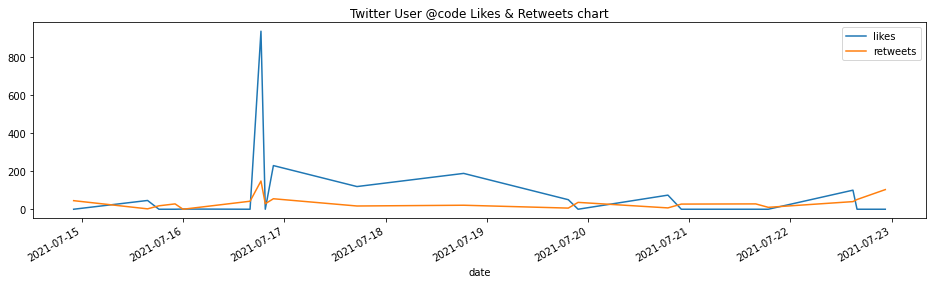

In [18]:
#Line Chart of twitter user's likes and retweets
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), label="likes", legend=True)

time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
plt.title("Twitter User " + screen_name + " Likes & Retweets chart") 